In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter
import numpy as np
import cv2


Implement a function that performs non-maximum suppression. You can leave it for the end

In [2]:
def nonmax_suppression(harris_resp, thr, halfwidth=2):
    # Outputs:
    # 1) cornersy: list with row coordinates of identified corner pixels.
    # 2) cornersx: list with respective column coordinates of identified corner pixels.
    # Elements from the two lists with the same index must correspond to the same corner.
    
    cornersy = []
    cornersx = []
    h, w = im.shape[:2]
    # TODO: perform non-maximum suppression

    return cornersy, cornersx

Implement the main part of the exercise

In [26]:
# Define parameters
sigma_w = 2.0
sigma_d = 2.0
kappa = 0.04
rot_angle = 0
thresh = 800

# Read the image
im = cv2.imread('../images/CircleLineRect.png', 0)
im = im.astype('float')

# Rotation of the image
if rot_angle != 0:
    im = rotate(im, rot_angle)

# TODO: Implement Harris corners
# Useful functions: gaussian_filter1d, gaussian_filter

I_x = np.diff(gaussian_filter(input=im, sigma=sigma_d), axis=0)
print(np.shape(I_x))
I_x 
# I_y = np.convolve(np.diff(gaussian_filter(input=im, sigma=sigma_d), axis=1), im)
# .........
# H = ...
# corn = nonmax_suppression(har,thresh,2)


(299, 300)


Visualization of the results

NameError: name 'H' is not defined

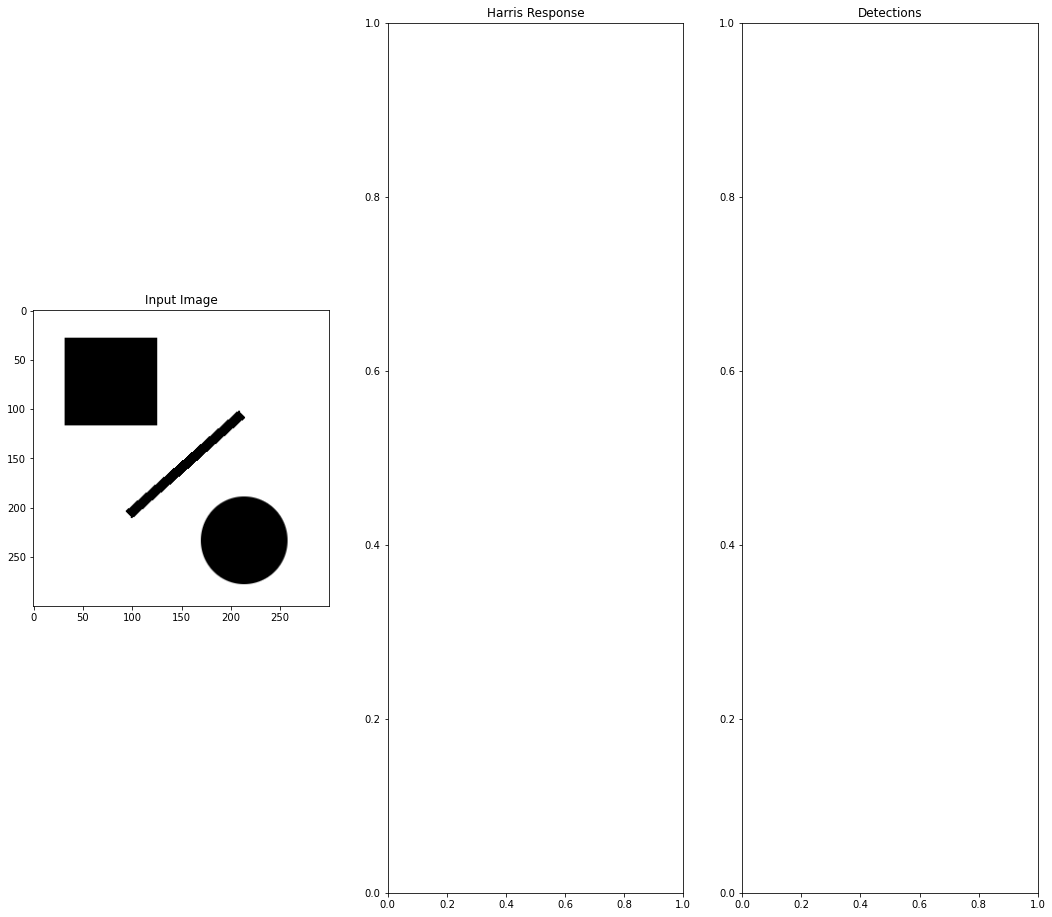

In [4]:
# Plotting of results
# No need to change it
plt.close("all")
plt.ion()
f, ax_arr = plt.subplots(1, 3, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Harris Response")
ax_arr[2].set_title("Detections")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(H, cmap='gray')
ax_arr[2].imshow(im, cmap='gray')
ax_arr[2].scatter(x=corn[1], y=corn[0], c='r', s=10)